1. To get the pruned model, run: 
    > python main.py --experiment prune-only --pruner synflow --prune-epochs 2 --post-epochs 0 --model conv --save-pruned

2. Results will get saved in "Results/pruned/default/{model_name}/{pruner}/{epoch}_prune.pth"
3. In the get_model function, choose which epoch to load

In [1]:
import os
print(os.getcwd())
import sys
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

/home/udit/programs/Synaptic-Flow/Notebooks
/home/udit/programs/Synaptic-Flow


In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
from load_pruned import get_model
import numpy as np
from numpy.linalg import svd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def get_per_layer_masked_weights_for_epoch(model):
    layer_dict = {}
    for name, param in model.state_dict().items():
        it, weight = name.split('.')
        if 'bias' not in name:
            if it in layer_dict:
                existing_weight = layer_dict[it]
                masked_weight = np.multiply(param.numpy(), existing_weight)
                layer_dict[it] = masked_weight
            else:
                layer_dict[it] = param.numpy()
    return layer_dict

def get_per_layer_singular_values(masked_weights_dict):
    per_layer_singular_values = {}

    for it, masked_weight in masked_weights_dict.items():
        s = svd(masked_weight, compute_uv=False)
        per_layer_singular_values[it] = s.tolist()
    
    return per_layer_singular_values


def plot_per_epoch_singular_values(model="fc", dataset="mnist", prune_type="default", epoch=0):
    model = get_model(dataset, prune_type, model, epoch=epoch)
    per_layer_masked_weights = get_per_layer_masked_weights_for_epoch(model)
    per_layer_singular_values = get_per_layer_singular_values(per_layer_masked_weights)
    df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in per_layer_singular_values.items() ]))
    sns.catplot(data=df)
    plt.show()
    
    
def plot_per_layer_singular_values(model="fc", dataset="mnist", prune_type="default", total_epochs=1):
    for epoch in range(total_epochs):
        print("EPOCH: ", epoch)
        plot_per_epoch_singular_values(model=model, dataset=dataset, prune_type=prune_type, epoch=epoch)
    


EPOCH:  0
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/0_prune.pth


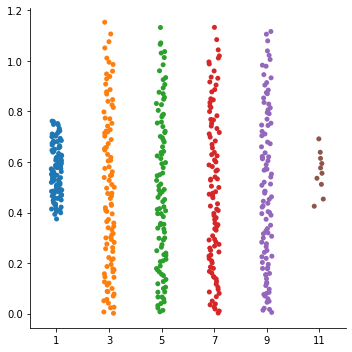

EPOCH:  1
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/1_prune.pth


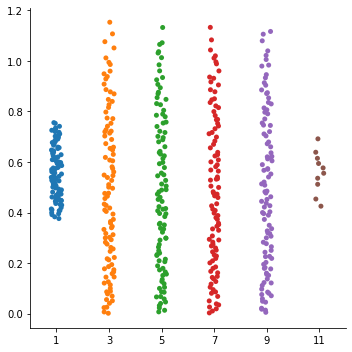

EPOCH:  2
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/2_prune.pth


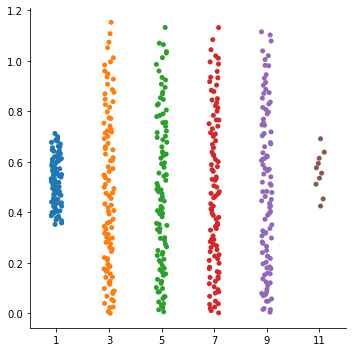

EPOCH:  3
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/3_prune.pth


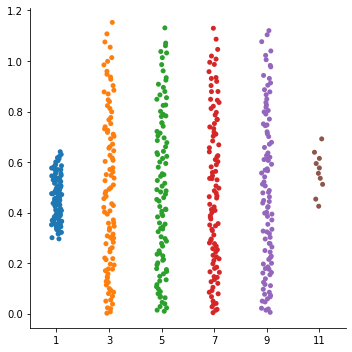

EPOCH:  4
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/4_prune.pth


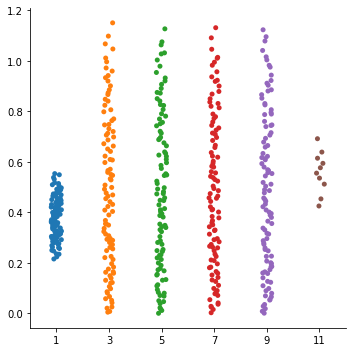

EPOCH:  5
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/5_prune.pth


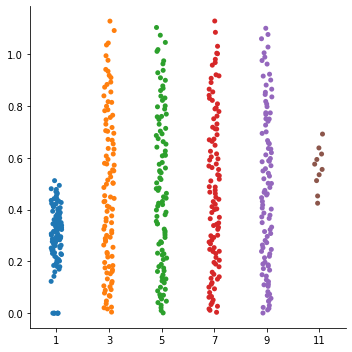

EPOCH:  6
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/6_prune.pth


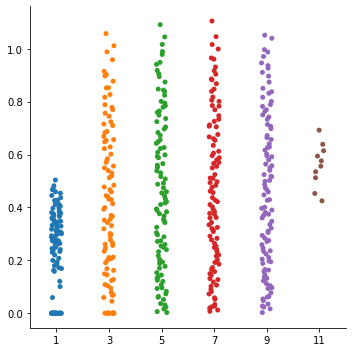

EPOCH:  7
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/7_prune.pth


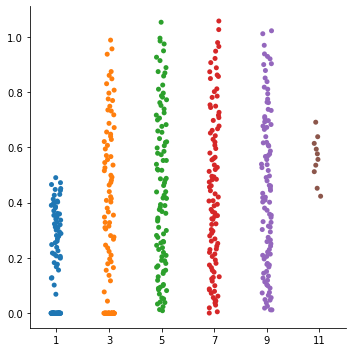

EPOCH:  8
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/8_prune.pth


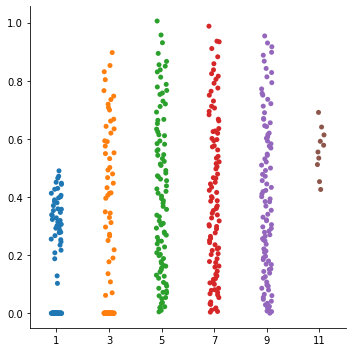

EPOCH:  9
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/9_prune.pth


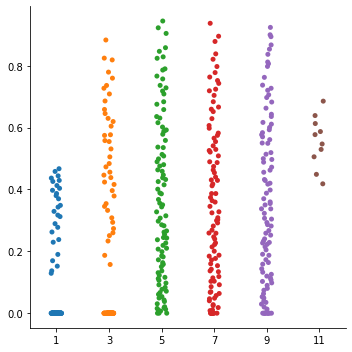

In [5]:
plot_per_layer_singular_values("fc", "mnist", "default", 10)

EPOCH:  0
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/0_prune.pth


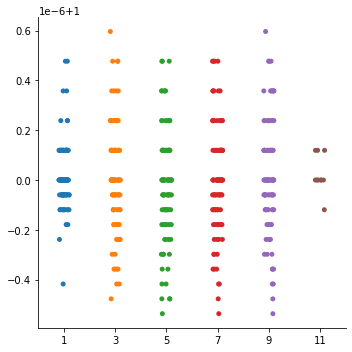

EPOCH:  1
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/1_prune.pth


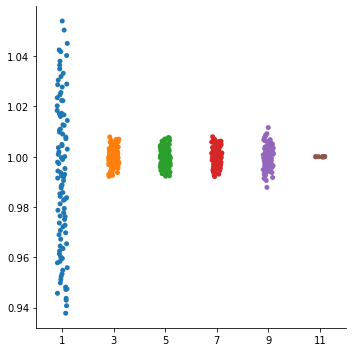

EPOCH:  2
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/2_prune.pth


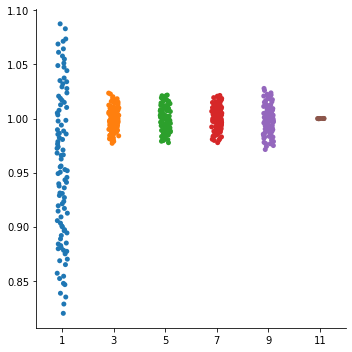

EPOCH:  3
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/3_prune.pth


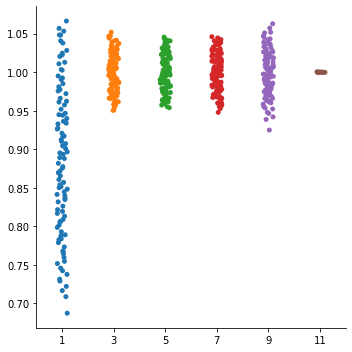

EPOCH:  4
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/4_prune.pth


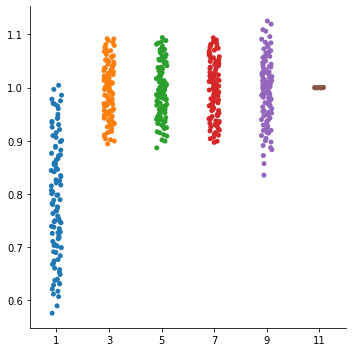

EPOCH:  5
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/5_prune.pth


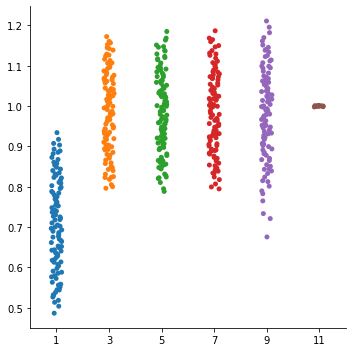

EPOCH:  6
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/6_prune.pth


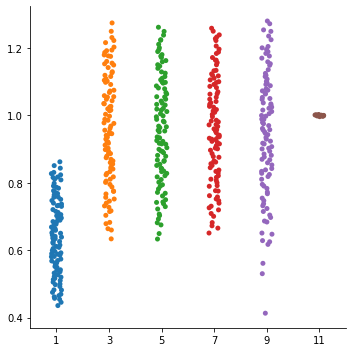

EPOCH:  7
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/7_prune.pth


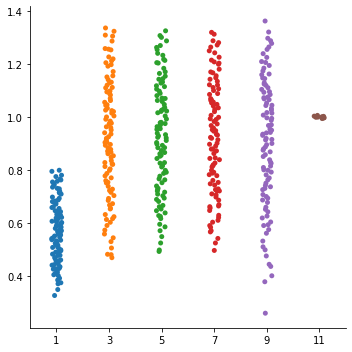

EPOCH:  8
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/8_prune.pth


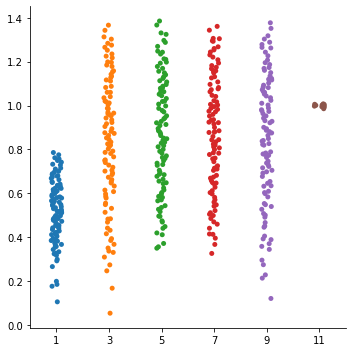

EPOCH:  9
Loading mnist dataset.
Creating default-fc-orth model.
Loading model from: ../Results/pruned/default/fc-orth/synflow/9_prune.pth


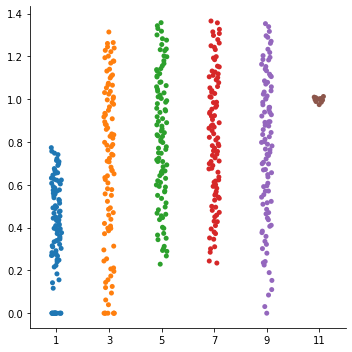

In [6]:
plot_per_layer_singular_values("fc-orth", "mnist", "default", 10)

EPOCH:  0
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/0_prune.pth


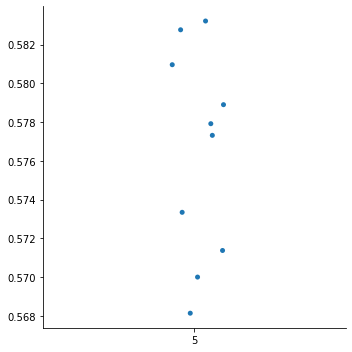

EPOCH:  1
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/1_prune.pth


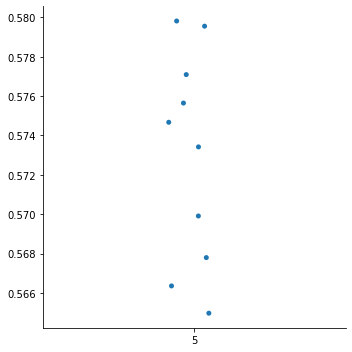

EPOCH:  2
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/2_prune.pth


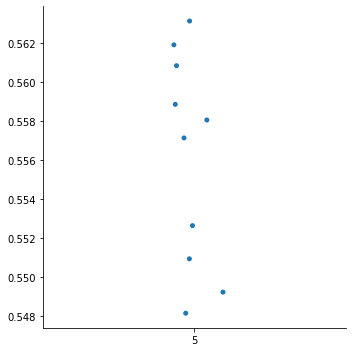

EPOCH:  3
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/3_prune.pth


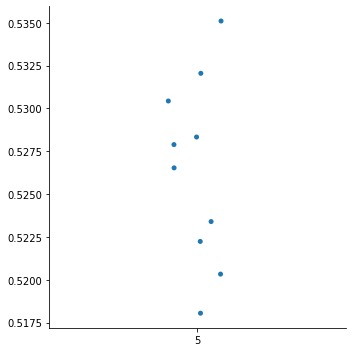

EPOCH:  4
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/4_prune.pth


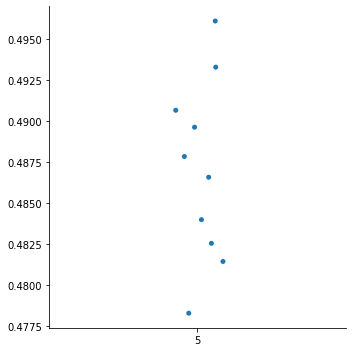

EPOCH:  5
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/5_prune.pth


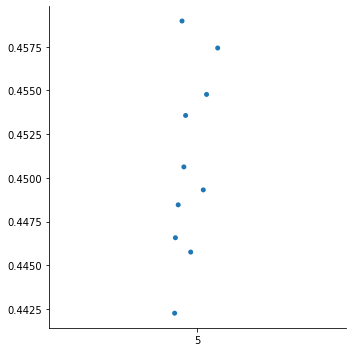

EPOCH:  6
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/6_prune.pth


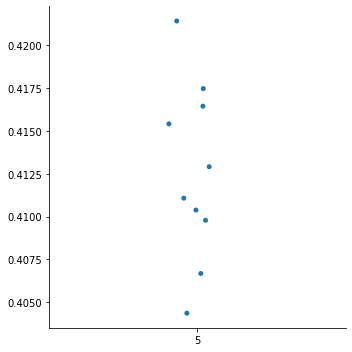

EPOCH:  7
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/7_prune.pth


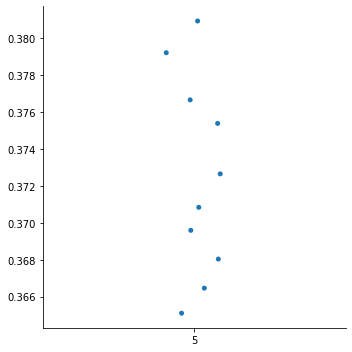

EPOCH:  8
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/8_prune.pth


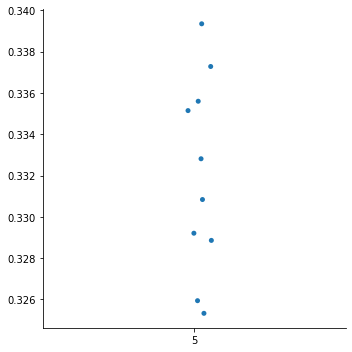

EPOCH:  9
Loading mnist dataset.
Creating default-conv model.
Loading model from: ../Results/pruned/default/conv/synflow/9_prune.pth


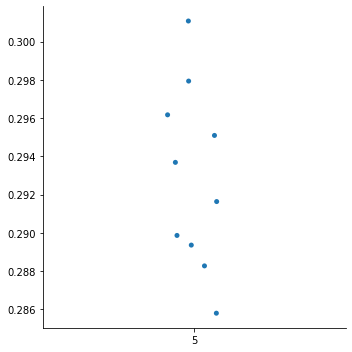

In [7]:
plot_per_layer_singular_values("conv", "mnist", "default", 10)

EPOCH:  0
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/0_prune.pth


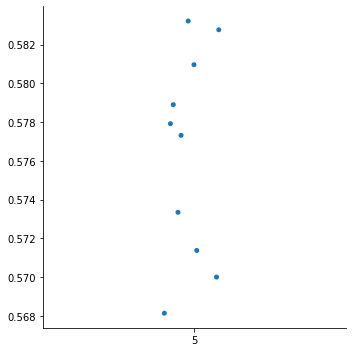

EPOCH:  1
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/1_prune.pth


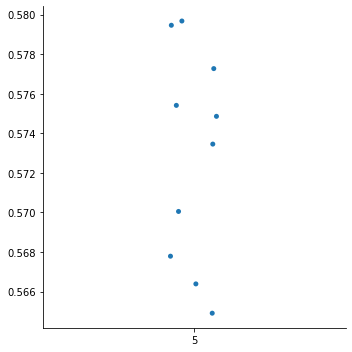

EPOCH:  2
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/2_prune.pth


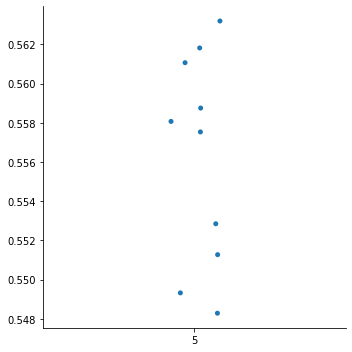

EPOCH:  3
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/3_prune.pth


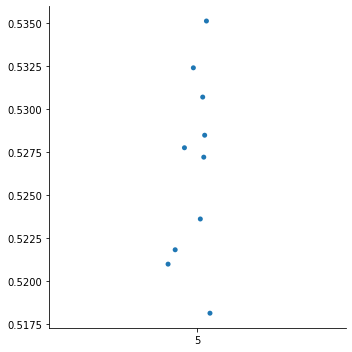

EPOCH:  4
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/4_prune.pth


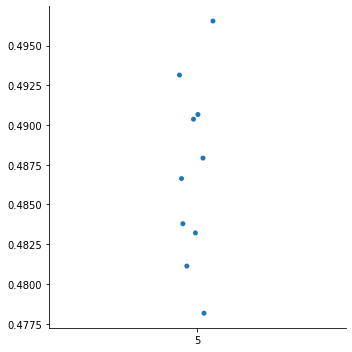

EPOCH:  5
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/5_prune.pth


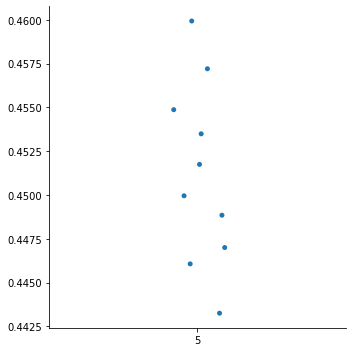

EPOCH:  6
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/6_prune.pth


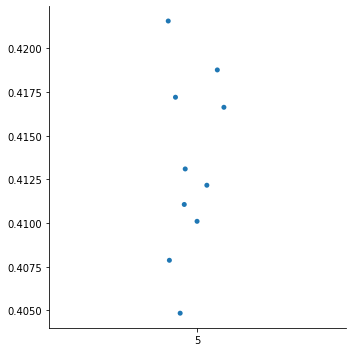

EPOCH:  7
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/7_prune.pth


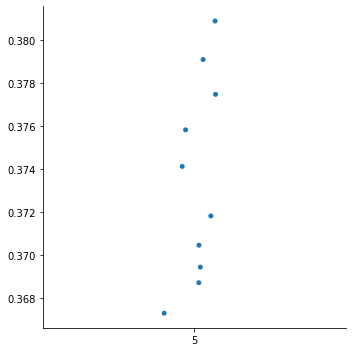

EPOCH:  8
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/8_prune.pth


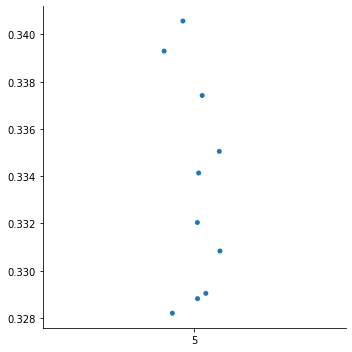

EPOCH:  9
Loading mnist dataset.
Creating default-conv-orth model.
Loading model from: ../Results/pruned/default/conv-orth/synflow/9_prune.pth


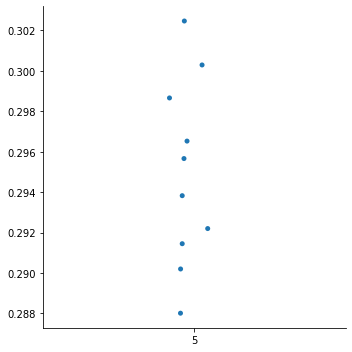

In [8]:
plot_per_layer_singular_values("conv-orth", "mnist", "default", 10)

In [1]:
import aleph as al

In [48]:
def get_per_epoch_total_persistence(total_epochs=10):
    for epoch_iter in range(total_epochs):
        model = get_model(dataset="mnist", pruner="synflow", model_class="default", 
                          model_name="fc", epoch=epoch_iter)
        weights = model.state_dict()
        print(get_total_persistence(weights))

# Pruner Synflow - 10 prune epochs, 10 post epochs

In [50]:
get_per_epoch_total_persistence(10)

Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/0_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/1_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/2_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/3_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/4_prune.pth
1.weight
3.weight
5.weigh

# Pruner - 0 prune_epochs, 20 post-epochs

In [52]:
get_per_epoch_total_persistence(10)

Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/0_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/1_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/2_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/3_prune.pth
1.weight
3.weight
5.weight
7.weight
9.weight
11.weight
(89.2495875279676, 0.22902700002549783)
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/4_prune.pth
1.weight
3.weight
5.weigh

In [43]:
import collections
import math

import numpy as np
import aleph as al


class PerLayerCalculation:
    """
    Calculates total persistence for a set of weight matrices. Each
    weight matrix is considered to describe a bipartite graph, i.e.
    an individual layer.
    """

    def __call__(self, weights):
        """
        Given a set of weights (supplied as an ordered dictionary) for
        some layers, performs normalization and transforms each of the
        layers into a bipartite graph.
        """

        # Pre-process weights in order to ensure that they already satisfy
        # the filtration constraints correctly.

        W_min = min( [ torch.min(weight) for _, weight in weights.items() ] )
        W_max = max( [ torch.max(weight) for _, weight in weights.items() ] )
        W     = max( abs(W_min), abs(W_max) )

        # Will store individual total persistence values (normalized and
        # regular ones) per layer, including a total persistence for the
        # complete network, which is the sum of the layers.
        result                                   = collections.defaultdict(dict)
        accumulated_total_persistence            = 0.0
        accumulated_total_persistence_normalized = 0.0

        for name, M in weights.items():
            if "bias" in name or "mask" in name: 
                continue
            print(name)
            D  = al.calculateZeroDimensionalPersistenceDiagramOfMatrix( \
                    torch.abs(M) / W,                                      \
                    reverseFiltration = True,                           \
                    vertexWeight      = 1.0,                            \
                    unpairedData      = 0.0)
            tp = al.norms.pNorm(D)
            n  = M.shape[0] + M.shape[1]

            result[name]["total_persistence"]            = tp
            result[name]["total_persistence_normalized"] = tp / math.sqrt(n-1)

            accumulated_total_persistence            += tp
            accumulated_total_persistence_normalized += tp / math.sqrt(n-1)

        result["global"]["accumulated_total_persistence"]            = accumulated_total_persistence
        result["global"]["accumulated_total_persistence_normalized"] = accumulated_total_persistence_normalized / sum( 1 for M in weights.values() )

        return result

    def _to_simplicial_complex(self, M):
        """
        Converts an adjacency matrix to a simplicial complex. Does not
        change the weights and will apply a default filtration.
        """

        n,m = M.shape

        # Vertices
        vertices = []
        for i in range(n+m):
            vertices.append( al.Simplex([i], 1.0) )

        # Edges
        edges = []
        for i in range(n):
            for j in range(m):
                edges.append( al.Simplex([i,j+n], M[i,j]) )

        edges = sorted(edges, key = lambda x: x.data, reverse=True)

        # Simplicial complex
        K = al.SimplicialComplex()

        for vertex in vertices:
            K.append(vertex)

        for edge in edges:
            K.append(edge)

        return K

    def _calculate_persistence_diagram_and_pairing(self, K):
        """
        Calculates a zero-dimensional persistence diagram and its
        corresponding persistence pairing. The pairing is used to
        assign total persistence values per vertex, if desired by
        the client.
        """

        # Notice that the second argument ensures that the diagram will
        # not contain any unpaired points. This is tested afterwards in
        # order to ensure that the conversion worked.
        pd, pp = al.calculateZeroDimensionalPersistenceDiagramAndPairing(K, 0.0)

        assert pd.betti == 0
        return pd, pp

def get_total_persistence(weights):
    plc    = PerLayerCalculation()
    values = plc(weights)

    return values['global']['accumulated_total_persistence'],\
           values['global']['accumulated_total_persistence_normalized']

1.weight
1.weight_mask
3.weight
3.weight_mask
5.weight
5.weight_mask
7.weight
7.weight_mask
9.weight
9.weight_mask
11.weight
11.weight_mask


(118.71845678536984, 0.30285764043771196)